In [1]:
from itertools import product, combinations
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats
from statsmodels.stats.anova import AnovaRM

In [2]:
if os.path.exists('src'):
    %load_ext autoreload
    %autoreload 2

    from src.chi2_test import chi2_test
else:
    !pip install pingouin
    !git clone https://github.com/P-Mihail/medstats_ex.git

    from medstats_ex.src.chi2_test import chi2_test  # type: ignore
    
from pingouin import power_ttest, power_anova

### Глава 9
#### Анализ повторных измерений



##### ПАРНЫЙ КРИТЕРИЙ СТЬЮДЕНТА

Используется одна группа, измеряется значение признака до и после воздействия и вычисляется его изменение. Находится среднее изменение и проводится оценка его отличия от нуля. Такой подход более точно улавливает различия, вызванные воздействием, нежели сравнение двух независимых групп, «зашумленное» разбросом значений у разных членов групп.

H0: среднее изменение равно нулю.

$t=\cfrac{\text{Оценка параметра} - \text{Истинное значение параметра}}{\text{Стандартная ошибка оценки параметра}}=\cfrac{\overline{d} - \delta}{S_{\overline{d}}}$, где $\delta$ - — истинное среднее изменение параметра, $\overline{d}$ - наблюдаемое (выборочное) среднее изменение параметра, $S_{\overline{d}}$ - стандартная ошибка выборочного стандартного отклонения изменения параметра.

*Напоминание*: $S_{\overline{d}} = \cfrac{S_d}{\sqrt{n}} = \sqrt{\cfrac{\sum{(d-\overline{d})^2}}{n(n-1)}}$ 

Т.О. при условии нулеваой гипотезы: $t = \cfrac{\overline{d}}{S_{\overline{d}}}$, критическое значение для $t_{\alpha}$ вычисляется для $\nu=n-1$ числа степеней свободы.

!!! Парный критерий Стьюдента требует нормального распределения изменений данных.

##### НОВЫЙ ПОДХОД К ДИСПЕРСИОННОМУ АНАЛИЗУ

В дисперсионном анализе для проверки нулевой гипотезы (все методы идентичны и взяты из одной нормально распределенной совокупности) сравнивался разброс значений относительно групповых средних с разбросом самих групповых средних. Если разброс средних значительно превышал разброс значений, мы отвергали нулевую гипотезу. В качестве показателя разброса мы использовали дисперсию. Дисперсию можно определить как сумма квадратов отклонений, деленную на число степеней свободы.

Теперь показателем разброса будет служить сама сумма квадратов отклонений, которую называют вариацией. Основываясь на вариации, можно повторить построение дисперсионного анализа.

**Новые обозначения (и вывод старых формул из 3 главы)**

$X_{ij}$ - значение признака у j-го члена, i-й группы.

$\overline{X}_i$ - средние по группам.

$S_i = \sum_{j}{(X_{ij} - \overline{X}_i)^2}$ - групповые вариации (суммы квадратов отклонений от среднего по группе).

$\overline{X}$ - среднее по всем группам.

$S_{общ} = \sum_{i}\sum_{j}{(X_{ij} - \overline{X})^2}$ - общая вариация.

$S_{вну} = \sum{S_i}$ - внутригрупповая вариация (внутригрупповая дисперсия через внутригрупповую вариацию - $s_{вну}^2 = \cfrac{S_{вну}}{\nu_{вну}} = \cfrac{S_{вну}}{m(n-1)}$) 

! внутригрупповая вариация — это сумма квадратов отклонений от групповых средних, поэтому она не зависит от того, различаются эти средние или нет.

Межгрупповая дисперсия отражает разброс групповых средних.

$s_{меж}^2=ns_{\overline{X}}^2$, где $s_{\overline{X}}^2 = \cfrac{\sum_i{(\overline{X}_i-\overline{X})^2}}{m-1}$

Межгрупповая вариация - $S_{меж} = n\sum_i{(\overline{X}_i-\overline{X})^2}$, тогда $s_{меж}^2=\cfrac{S_{меж}}{\nu_{меж}}=\cfrac{S_{меж}}{m-1}$.

Формула для F критерия: $F = \cfrac{S_{меж}/\nu_{меж}}{S_{вну}/\nu_{вну}}$

**Разложение общей вариации**

Внутригрупповая вариация $S_{вну}$ служит мерой разброса значений внутри групп. В свою очередь, межгрупповая вариация $S_{меж}$ — это мера разброса групповых средних, то есть различий между группами. Но существует и мера общего разброса значений. Это общая сумма квадратов отклонений всех наблюдаемых значений от их общего среднего. Она называется общей вариацией и обозначается $S_{общ}$:

$S_{общ} = \sum_{i}\sum_{j}{(X_{ij} - \overline{X})^2}$

$s_{общ}^2 = \cfrac{S_{общ}}{\nu_{общ}} = \cfrac{S_{общ}}{mn-1}$ - общая дисперсия.

!!! Общая вариация равна сумме внутригрупповой и межгрупповой вариаций: $S_{общ}=S_{вну}+S_{меж}$

**ТАБЛИЦА ДИСПЕРСИОННОГО АНАЛИЗА**

_|Вариация|Число степеней свободы|Дисперсия
-|-|-|-
Межгрупповая|$S_{меж}$|$\nu_{меж}$|$s_{меж}^2$
Внутригрупповая|$S_{вну}$|$\nu_{вну}$|$s_{вну}^2$
Общая|$S_{общ}$|$\nu_{общ}$|
$F = \cfrac{S_{меж}/\nu_{меж}}{S_{вну}/\nu_{вну}}$

##### ДИСПЕРСИОННЫЙ АНАЛИЗ ПОВТОРНЫХ ИЗМЕРЕНИЙ

Общая вариация $S_{общ}$ разделяется на межиндивидуальную $S_{ми}$ внутрииндивидуальную $S_{ви}$, последняя, в свою очередь, распадается на обусловленную воздействием (лечением) $S_{ле}$ и остаточную $S_{ост}$, обусловленную случайными колебаниями, ошибкой измерения и т.п.

$X_{ij}$ - значение признака у j-го члена, посе i-го воздействия.

$\overline{X}_j = \cfrac{\sum_i{X_{ij}}}{m}$ - это «индивидуальные» средние (средние значения признака при всех воздействиях у 1-го, 2-го и т. д. члена), где m - число воздействий. 

$\overline{T}_i = \cfrac{\sum_j{X_{ij}}}{n}$ - средние значения признака у всех членов при 1-м, 2-м и т. д. методе воздействия, где n - число членов.

Общая вариация — это сумма квадратов отклонений всех значений (у всех членов при всех методах воздействий) от общего среднего, которое составляет: $\overline{X}=\cfrac{\sum_i\sum_j{X_{ij}}}{mn}$

таким образом, $S_{общ}=\sum_i\sum_j{(X_{ij} - \overline{X})^2}$, соответствующее число степеней свободы $\nu_{общ}=mn-1$

Общая вариация складывается из межиндивидуальной (сумма квадратов отклонений индивидуальных средних от общего среднего) и внутрииндивидуальной вариации (сумма квадратов отклонений от индивидуального среднего).

$S_{ви} = \sum_j\sum_i(X_{ij} - \overline{X}_j)^2$, $\nu_{ви}=n(m-1)$

$S_{ми} = m\sum(\overline{X}_j-\overline{X})^2$ (Множитель m появляется из-за того, что каждое $\overline{X}_j$ — это среднее по m методам), $\nu_{ми}=n-1$

$S_{общ} = S_{ви} + S_{ми}$

Внутрииндивидуальную вариацию можно разделить на вариацию связанную с воздействием $S_{ле}$ и остаточную вариацию $S_{ост}$, связанную со случайными отклонениями и ошибками измерения.

$S_{ле} = n\sum(\overline{T}_i - \overline{X})^2$ (Множитель n связано с тем, что каждое $\overline{T}_i$ — это среднее по n больным), $\nu_{ле}=m-1$

$S_{ост} = S_{ви} - S_{ле}$, $\nu_{ост} = \nu_{ви} - \nu_{ле} = (n-1)(m-1)$

Теперь мы можем получить две независимые оценки дисперсии: на основании вариации, связанной с воздействием $s_{ле}^2 = \cfrac{S_{ле}}{\nu_{ле}}$ и на основании остаточной вариации: $s_{ост}^2 = \cfrac{S_{ост}}{\nu_{ост}}$.

после чего можно применить знакомый критерий F: $F = \cfrac{s_{ле}^2}{s_{ост}^2}$, Вычисленное значение F сравнивают с критическим для выбранного уровня значимости и числа степеней свободы (меж -> ле, вн -> ост)

**Как выявить различия в повторных измерениях**

Множественные сравнения с поправкой Бонферрони. Применим только после того, как дисперсионный анализ обнаружит сам факт существования различий.

уровени значимости в каждом сравнении: $\alpha = \alpha'/k$, где k - число сравнений, $\alpha'$ истинный уровень значимости (по всем сравнениям в целом).

При дисперсионном анализе повторных измерений схема использования критерия остается прежней. Отличие в том, что в формуле для t вместо $s^2$ следует взять остаточную дисперсию
$s_{ост}^2$ , а средние по группам заменить на средние по методам воздействия (моментам наблюдения) $\overline{T}_i$:

$t = \cfrac{\overline{T}_i - \overline{T}_j}{\sqrt{\cfrac{2s_{ост}^2}{n}}}$ 
Полученное значение нужно сравнить с критическим значением для распределения Стьюдента при $\nu_{ост}$ степенях свободы.

!!! вместо поправки Бонферрони можно воспользоваться более точным критерием Ньюмена—Кейлса или критерием Тыоки. Кроме того, измерения, выполненные до
начала воздействий, играют роль «контрольной группы», поэтому пригоден и критерий Даннета для множественного сравнения с контрольной группой. При их применении нужно, как и в случае критерия Стьюдента с поправкой Бонферрони, в качестве оценки дисперсии брать $s_{ост}^2$, а при нахождении критического значения использовать число степеней свободы остаточной вариации $\nu_{ост}$.

**Чувствительность дисперсионного анализа повторных измерений**

Чувствительность вычисляется так же, как в обычном дисперсионном анализе, с той разницей, что в качестве оценки для s используется $s_{ост}^2$, а вместо численности отдельных групп — численность единственной рассматриваемой группы.

##### КАЧЕСТВЕННЫЕ ПРИЗНАКИ: КРИТЕРИЙ МАК-НИМАРА

Критерий Мак-Нимара, подобно парному критерию Стьюдента, часто используется для выявления изменений в наблюдениях типа «до—после», когда интересующий нас признак принимает одно из двух значений («есть—нет»). Другое, очень важное, применение критерия связано с анализом парных наблюдений.

шаги критерия Мак-Нимара:

* Исключите из рассмотрения больных, реакция которых была неизменной, и подсчитайте число тех, чья реакция изменилась.
* Поделите это число пополам.
* Вычислите меру отклонения наблюдаемого числа меняющих реакцию больных от ожидаемого. Для этого воспользуйтесь критерием $\chi^2$ с поправкой Йейтса.
* Сравните полученное значение $\chi^2$ с критическим, имеющим одну степень свободы.

##### ОБОЗНАЧЕНИЯ
> в иностранной литературе вариацию называют SS (от англ. Sum of Squares). <br />
> общ -> total, меж -> bg, вну -> wg, ост -> res, ле -> treat

#### Задачи

**9.1.**

В исследовании Ф. Эшли и соавт., о котором мы уже говорили в задаче 8.8, сравнивали два средства для предупреждения образования зубного налета: хлоргексидин и хлорид аммония. Каждый из участников исследования в течение 48 часов полоскал рот одним из средств, после чего налет оценивали визуально. Через некоторое время опыт повторяли с другим средством (очередность определялась случайным образом). Были получены следующие результаты.

Хлорид аммония|Хлоргексидин
-|-
32|14
60|39
25|24
45|13
65|9
60|3
68|10
83|14
120|1
110|36

Эффективно ли полоскание хлоридом аммония?

In [3]:
df = pd.DataFrame(data=[[32,14], [60,39], [25,24], [45,13], [65,9], [60,3], [68,10], [83,14], [120,1], [110,36]],
                  columns=["Хлорид аммония", "Хлоргексидин"])

display(df)

,Хлорид аммония,Хлоргексидин
0,32,14
1,60,39
2,25,24
3,45,13
4,65,9
5,60,3
6,68,10
7,83,14
8,120,1
9,110,36


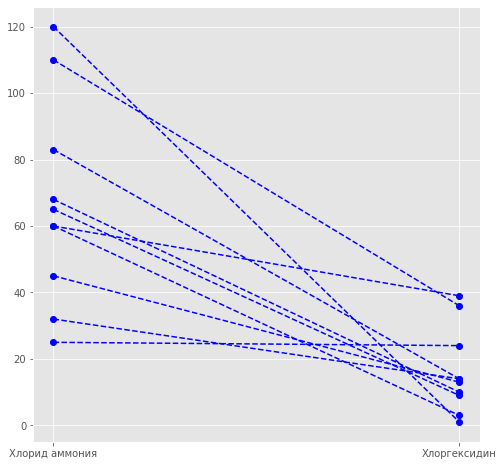

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.plot(df.T, '--bo');

In [5]:
diff = (df["Хлорид аммония"] - df["Хлоргексидин"])

t = diff.mean() / (diff.std(ddof=1) / len(diff)**.5)
p = 2 * scipy.stats.t.cdf(-abs(t), df=len(diff)-1)

print(f"t = {t:.3f}, v = {len(diff)-1}, p = {p:.3f}")

t = 4.690, v = 9, p = 0.001


In [6]:
# вариант 2. F-test

AnovaRM(df.reset_index().melt(id_vars="index"),
        "value", 
        "index",
        ["variable"]).fit().anova_table

,F Value,Num DF,Den DF,Pr > F
variable,21.996502,1.0,9.0,0.001136


Полоскание с хлоргексидином более эффективно.

**9.2.**

В раннем детстве антибактериальную защиту (в частности, от стрептококков) обеспечивают антитела, полученные от матери. Если антител к стрептококкам вырабатывается у матери недостаточно, ребенок оказывается беззащитным перед этим микробом. В таких случаях беременным предлагали вводить пневмококковую вакцину: считалось, что благодаря сходству антигенной структуры пневмококка и стрептококка это позволит усилить выработку антител к стрептококкам. К. Бейкер с соавт. (С. Baker et al. Influence of preimmunization antibody levels on the specificity of the immune response to related polysaccharide antigens. N. Engl. J. Med., 303:173?178, 1980) ввели пневмококковую вакцину 20 женщинам и определили уровень антител к пневмококкам и стрептококкам до и после вакцинации. Вот что обнаружили исследователи.

Концентрация антител до и после вакцинации:

Антитела к пневмококкам, мкг/мл|Антитела к стрептококкам, мкг/мл
-|-
79 -> 163|0.4 -> 0.4
100 -> 127|0.4 -> 0.5
133 -> 288|0.4 -> 0.5
141 -> 1154|0.4 -> 0.9
43 -> 666|0.5 -> 0.5
63 -> 156|0.5 -> 0.5
127 -> 644|0.5 -> 0.5
140 -> 273|0.5 -> 0.5
145 -> 231|0.5 -> 0.5
217 -> 1097|0.6 -> 12.2
551 -> 227|0.6 -> 0.6
170 -> 310|0.7 -> 1.1
1049 -> 1189|0.7 -> 1.2
986 -> 1695|0.8 -> 0.8
436 -> 1180|0.9 -> 1.2
1132 -> 1194|0.9 -> 1.9
129 -> 1186|1.0 -> 2.0
228 -> 444|1.0 -> 0.9
135 -> 2690|1.6 -> 8.1
110 -> 95|2.0 -> 3.7

Оцените статистическую значимость изменения уровня антител к пневмококкам и стрептококкам

In [7]:
df = pd.DataFrame(data=[[79, 163, 0.4, 0.4], [100, 127, 0.4, 0.5], [133, 288, 0.4, 0.5], [141, 1154, 0.4, 0.9], [43, 666, 0.5, 0.5], 
                        [63, 156, 0.5, 0.5], [127, 644, 0.5, 0.5], [140, 273, 0.5, 0.5], [145, 231, 0.5, 0.5], [217, 1097, 0.6, 12.2], 
                        [551, 227, 0.6, 0.6], [170, 310, 0.7, 1.1], [1049, 1189, 0.7, 1.2], [986, 1695, 0.8, 0.8], [436, 1180, 0.9, 1.2], 
                        [1132, 1194, 0.9, 1.9], [129, 1186, 1.0, 2.0], [228, 444, 1.0, 0.9], [135, 2690, 1.6, 8.1], [110, 95, 2.0, 3.7]],
                  columns=pd.MultiIndex.from_tuples(product(["Антитела к пневмококкам, мкг/мл", "Антитела к стрептококкам, мкг/мл"], ["До вакцинации", "После вакцинации"])))

display(df)

Антитела к пневмококкам, мкг/мл                   \
                     До вакцинации После вакцинации   
0                               79              163   
1                              100              127   
2                              133              288   
3                              141             1154   
4                               43              666   
5                               63              156   
6                              127              644   
7                              140              273   
8                              145              231   
9                              217             1097   
10                             551              227   
11                             170              310   
12                            1049             1189   
13                             986             1695   
14                             436             1180   
15                            1132             1194   
16                             129             1186   
17                             228              444   
18                             135             2690   
19                             110               95   

   Антитела к стрептококкам, мкг/мл                   
                      До вакцинации После вакцинации  
0                               0.4              0.4  
1                               0.4              0.5  
2                               0.4              0.5  
3                               0.4              0.9  
4                               0.5              0.5  
5                               0.5              0.5  
6                               0.5              0.5  
7                               0.5              0.5  
8                               0.5              0.5  
9                               0.6             12.2  
10                              0.6              0.6  
11                              0.7              1.1  
12                              0.7              1.2  
13                              0.8              0.8  
14                              0.9              1.2  
15                              0.9              1.9  
16                              1.0              2.0  
17                              1.0              0.9  
18                              1.6              8.1  
19                              2.0              3.7

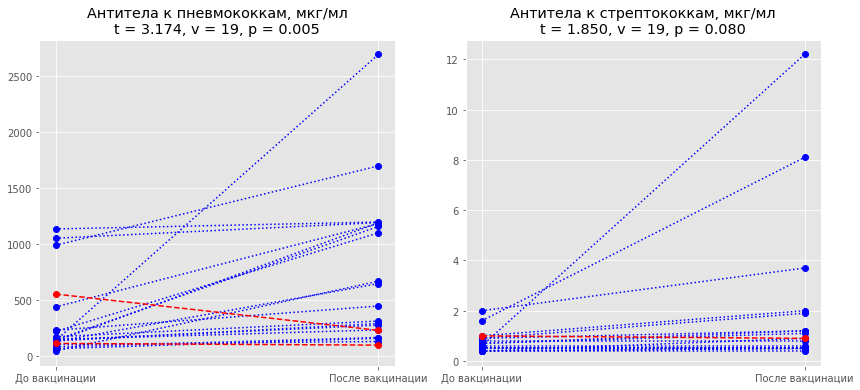

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for i, c in enumerate(["Антитела к пневмококкам, мкг/мл", "Антитела к стрептококкам, мкг/мл"]):
    diff = (df[(c, "После вакцинации")] - df[(c, "До вакцинации")])

    axs[i].plot(df[c].query("`После вакцинации` >= `До вакцинации`").T, ":bo");
    axs[i].plot(df[c].query("`После вакцинации` < `До вакцинации`").T, "--ro");

    diff = df[(c, "После вакцинации")] - df[(c, "До вакцинации")]
    t = diff.mean() / (diff.std(ddof=1) / len(diff)**.5)
    p = 2 * scipy.stats.t.cdf(-abs(t), df=len(diff)-1)

    # print(f"{c}: t = {t:.3f}, p = {p:.3f}")
    axs[i].set_title(f"{c}\nt = {t:.3f}, v = {len(diff)-1}, p = {p:.3f}")

Антитела к пневмококкам: изменение статистически значимо. 
Антитела к стрептококкам: изменение статистически не значимо.

**9.3**

Чему равна вероятность обнаружить не менее чем двукратное увеличение концентрации антител к пневмококкам и стрептококкам при уровне значимости 0,05? 

Графики чувствительности критерия Стьюдента, изображенные на рис. 6.9, применимы к парному критерию Стьюдента, если используемое в них n приравнять к удвоенному объему выборки.

In [9]:
for i, c in enumerate(["Антитела к пневмококкам, мкг/мл", "Антитела к стрептококкам, мкг/мл"]):
    delta = df[c, "До вакцинации"].mean()  # средний начальный уровень
    sigma = (df[(c, "После вакцинации")] - df[(c, "До вакцинации")]).std(ddof=1)
    power = power_ttest(d = delta/sigma, n = 2*len(df))

    print(f"{c}:\n\t delta={delta:.3f}, sigma={sigma:.3f}, power={power*100:.3f}%")

Антитела к пневмококкам, мкг/мл:
	 delta=305.700, sigma=626.682, power=57.719%
Антитела к стрептококкам, мкг/мл:
	 delta=0.745, sigma=2.853, power=21.092%


**9.4.**

Решите задачу 9.2 с помощью дисперсионного анализа повторных измерений. Как связаны между собой значения F и парного критерия Стьюдента?

In [10]:
# решение влоб
for i, c in enumerate(["Антитела к пневмококкам, мкг/мл", "Антитела к стрептококкам, мкг/мл"]):
        at = AnovaRM(data=df[c][["До вакцинации", "После вакцинации"]].reset_index().melt(id_vars="index"), 
                     depvar="value", 
                     subject="index",
                     within=["variable"]).fit().anova_table
        print(c)
        display(at)

Антитела к пневмококкам, мкг/мл


,F Value,Num DF,Den DF,Pr > F
variable,10.073206,1.0,19.0,0.004999


Антитела к стрептококкам, мкг/мл


,F Value,Num DF,Den DF,Pr > F
variable,3.42175,1.0,19.0,0.07996


**Решение вручную:**

In [11]:
for i, c in enumerate(["Антитела к пневмококкам, мкг/мл", "Антитела к стрептококкам, мкг/мл"], start=1):
    m, n = 2, len(df)

    X = df[c][["До вакцинации", "После вакцинации"]].values
    X_j = X.mean(1)
    T_i = X.mean(0)
    X_mean = X.mean()

    SS_wg = ((X - X_j.reshape(-1,1))**2).sum().sum()
    SS_treat = n * ((T_i - X_mean)**2).sum()

    SS_res = SS_wg - SS_treat
    v_treat, v_res = m - 1, (n - 1)*(m - 1)
    
    F = (SS_treat / v_treat) / (SS_res / v_res)

    p = 1 - scipy.stats.f.cdf(F, dfn=v_treat, dfd=v_res)

    print(f"{i}. {c}: F = {F:.3f}, p = {p:.3f}")

1. Антитела к пневмококкам, мкг/мл: F = 10.073, p = 0.005
2. Антитела к стрептококкам, мкг/мл: F = 3.422, p = 0.080


Связь между F (при двух сравниваемых группах) и парным критерием Стьюдента: $F = t^2$

**9.5.**
При ишемической болезни сердца курение может вызвать приступ стенокардии. Это связано с тем, что никотин увеличивает потребность миокарда в кислороде, а окись углерода связывается с гемоглобином, тем самым снижая поступление кислорода. Однако не способствуют ли развитию приступов и другие компоненты табачного дыма? Чтобы выяснить это, У. Аронов (W. Aronow. Effect of non-nicotine cigarettes and carbon monoxide on angina. Circulation, 61:262—265, 1979) определил у 12 больных ишемической болезнью сердца продолжительность физической нагрузки до развития приступа стенокардии. У каждого больного опыт проводили до и после выкуривания пяти безникотиновых сигарет, а затем до и после вдыхания эквивалентного количества окиси углерода. Были получены следующие результаты.

Длительность нагрузки до развития приступа стенокардии, секунды:

Больной|До курения безникотиновых сигарет|После курения безникотиновых сигарет|До вдыхания окиси углерода|После вдыхания окисиуглерода
-|-|-|-|-
1|289|155|281|177
2|203|117|186|125
3|359|187|372|238
4|243|134|254|165
5|232|135|219|153
6|210|119|225|148
7|251|145|264|180
8|246|121|237|144
9|224|136|212|152
10|239|124|250|147
11|220|118|209|138
12|211|107|226|141

Какие выводы позволяют сделать эти данные?

In [12]:
df = pd.DataFrame(data=[[289, 155, 281, 177], [203, 117, 186, 125], [359, 187, 372, 238], [243, 134, 254, 165], [232, 135, 219, 153], 
                        [210, 119, 225, 148], [251, 145, 264, 180], [246, 121, 237, 144], [224, 136, 212, 152], [239, 124, 250, 147], 
                        [220, 118, 209, 138], [211, 107, 226, 141]],
                  columns=  #["До курения безникотиновых сигарет", "После курения безникотиновых сигарет", "До вдыхания окиси углерода", "После вдыхания окисиуглерода"]
                  pd.MultiIndex.from_tuples(product(["Курение безникотиновых сигарет", "Вдыхание окисиуглерода"], ["До", "После"])))


display(df)

Курение безникотиновых сигарет       Вдыхание окисиуглерода      
                               До После                     До После
0                             289   155                    281   177
1                             203   117                    186   125
2                             359   187                    372   238
3                             243   134                    254   165
4                             232   135                    219   153
5                             210   119                    225   148
6                             251   145                    264   180
7                             246   121                    237   144
8                             224   136                    212   152
9                             239   124                    250   147
10                            220   118                    209   138
11                            211   107                    226   141

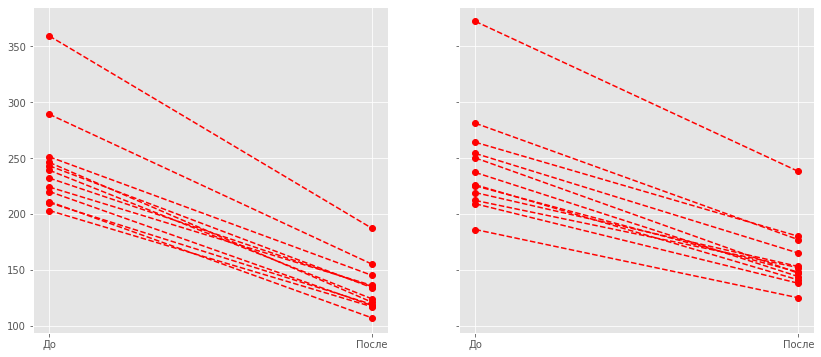

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, c in enumerate(["Курение безникотиновых сигарет", "Вдыхание окисиуглерода"]):
    axs[i].plot(df[c].query("До <= После")[["До", "После"]].T, ":bo");
    axs[i].plot(df[c].query("До > После")[["До", "После"]].T, "--ro");

In [14]:
df.columns = ["_".join(col) for col in df.columns]

display(df)

,Курение безникотиновых сигарет_До,Курение безникотиновых сигарет_После,Вдыхание окисиуглерода_До,Вдыхание окисиуглерода_После
0,289,155,281,177
1,203,117,186,125
2,359,187,372,238
3,243,134,254,165
4,232,135,219,153
5,210,119,225,148
6,251,145,264,180
7,246,121,237,144
8,224,136,212,152
9,239,124,250,147


In [15]:
AnovaRM(df.reset_index().melt(id_vars="index"),
        "value", 
        "index",
        ["variable"]).fit().anova_table

,F Value,Num DF,Den DF,Pr > F
variable,184.489709,3.0,33.0,1.092621e-20


**Различия статистически значимы!**

In [16]:
# ВАРИАНТ 1

print(f"alpha = {0.05 / 6:.5f}\n")

for c in combinations(df.columns, 2):
    m, n = 2, len(df)

    X = df[list(c)].values
    X_j = X.mean(1)
    T_i = X.mean(0)
    X_mean = X.mean()

    SS_wg = ((X - X_j.reshape(-1,1))**2).sum().sum()
    SS_treat = n * ((T_i - X_mean)**2).sum()

    v_res = (n - 1)*(m - 1)
    SS_res = SS_wg - SS_treat
    t = (T_i[0] - T_i[1]) * (len(df)*v_res/2/SS_res)**.5
    p = 2 * scipy.stats.t.cdf(-abs(t), df=v_res)

    # print(f"{c}: t = {t:.3f}, p = {p:.3f}")
    print(f"{c}\n\tt = {t:.3f}, v = {v_res}, p = {p:.5f}")

alpha = 0.00833

('Курение безникотиновых сигарет_До', 'Курение безникотиновых сигарет_После')
	t = 15.942, v = 11, p = 0.00000
('Курение безникотиновых сигарет_До', 'Вдыхание окисиуглерода_До')
	t = -0.176, v = 11, p = 0.86345
('Курение безникотиновых сигарет_До', 'Вдыхание окисиуглерода_После')
	t = 16.204, v = 11, p = 0.00000
('Курение безникотиновых сигарет_После', 'Вдыхание окисиуглерода_До')
	t = -12.612, v = 11, p = 0.00000
('Курение безникотиновых сигарет_После', 'Вдыхание окисиуглерода_После')
	t = -8.043, v = 11, p = 0.00001
('Вдыхание окисиуглерода_До', 'Вдыхание окисиуглерода_После')
	t = 13.927, v = 11, p = 0.00000


In [17]:
# ВАРИАНТ 2

# print(f"alpha = {0.05 / 6:.5f}\n")

# for c in combinations(df.columns, 2):
#     diff = df[c[0]] - df[c[1]]
#     t = diff.mean() / (diff.std(ddof=1) / len(diff)**.5)
#     p = 2 * scipy.stats.t.cdf(-abs(t), df=len(diff)-1)

#     print(f"{c}\n\tt = {t:.3f}, v = {len(diff)-1}, p = {p:.5f}")

Попарные сравнения с помощью критерия Стьюдента и поправки Бонферрони показывают, что результаты до курения и вдыхания окиси углерода статистически значимо не отличаются друг
от друга.
Остальные пары, статистически значимо отличаются друг от друга.

**9.6.**
Определяя эффективность гидралазина, Л. Рубин и Р. Питер измеряли не только легочное сосудистое сопротивление, но и сердечный выброс. Результаты приведены в таблице.

Больной|Измерение 1|Измерение 2|Измерение 3
-|-|-|-
1|3.5|8.6|5.1
2|3.3|5.4|8.6
3|4.9|8.8|6.7
4|3.6|5.6|5.0

Менялся ли сердечный выброс?

In [18]:
df = pd.DataFrame(data=[[3.5, 8.6, 5.1], [3.3, 5.4, 8.6], [4.9, 8.8, 6.7], [3.6, 5.6, 5.0]],
                  columns=["Измерение 1", "Измерение 2", "Измерение 3"])

display(df)

,Измерение 1,Измерение 2,Измерение 3
0,3.5,8.6,5.1
1,3.3,5.4,8.6
2,4.9,8.8,6.7
3,3.6,5.6,5.0


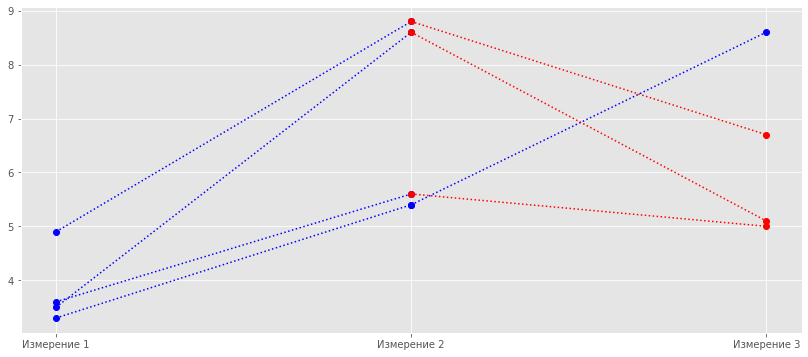

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

for i in range(1, 3):
    c1, c2 = f"Измерение {i}", f"Измерение {i+1}"
    ax.plot(df[[c1, c2]].query(f"`{c1}` <= `{c2}`").T, ":bo");
    ax.plot(df[[c1, c2]].query(f"`{c1}` > `{c2}`").T, ":ro");

In [20]:
AnovaRM(df.reset_index().melt(id_vars="index"),
        "value", 
        "index",
        ["variable"]).fit().anova_table

,F Value,Num DF,Den DF,Pr > F
variable,5.036593,2.0,6.0,0.052017


Различия статистически не значимы.

**9.7**

Существует операция ушивания желудка для похудания. Уменьшенный желудок наполняется быстрее и чувство насыщения возникает при меньшем объеме съеденной пиши. Нельзя ли обойтись без операции и ограничиться сдавливанием живота надувным поясом? При оценке эффективности последнего метода А. Гелибтер и соавт. (A. Geliebter et al. Extraabdominal pressure alters food intake, intragastric pressure, and gastric emptying rate. Am. J. Physiol., 250:R549—R552, 1986) наблюдали, какой объем пищи съедают добровольцы. Однако истинная цель исследования была скрыта. Участникам опыта объясняли, что по давлению внутри поясов измеряется увеличение живота во время еды и что исследователям нужно подобрать такое исходное давление, при котором измерения были бы наиболее точны. От участников требовалось есть до появления сытости. Вот каких показателей они достигли.

Исходное давление в поясе, мм рт. ст.:

Участник|0|10|20
-|-|-|-
1|448|470|292
2|472|424|390
3|631|538|508
4|634|496|560
5|734|547|602
6|820|578|508
7|643|711|724

Что позволяют заключить эти данные?

In [21]:
df = pd.DataFrame(data=[[448, 470, 292], [472, 424, 390], [631, 538, 508], [634, 496, 560], [734, 547, 602], [820, 578, 508], [643, 711, 724]],
                  columns=["0 мм рт. ст.", "10 мм рт. ст.", "20 мм рт. ст."])
                  
display(df)

,0 мм рт. ст.,10 мм рт. ст.,20 мм рт. ст.
0,448,470,292
1,472,424,390
2,631,538,508
3,634,496,560
4,734,547,602
5,820,578,508
6,643,711,724


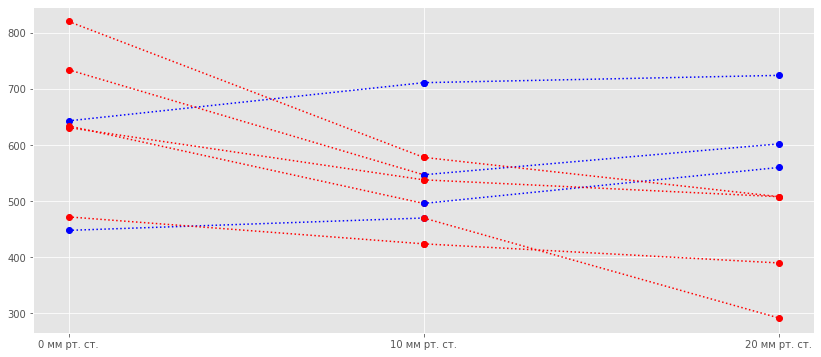

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

for c1, c2 in  [["0 мм рт. ст.", "10 мм рт. ст."], ["10 мм рт. ст.", "20 мм рт. ст."]]:
    ax.plot(df[[c1, c2]].query(f"`{c1}` <= `{c2}`").T, ":bo");
    ax.plot(df[[c1, c2]].query(f"`{c1}` > `{c2}`").T, ":ro");

In [23]:
AnovaRM(df.reset_index().melt(id_vars="index"),
        "value", 
        "index",
        ["variable"]).fit().anova_table

,F Value,Num DF,Den DF,Pr > F
variable,4.564149,2.0,12.0,0.033566


Различия статистически значимы.

In [24]:
print(f"alpha = {0.05 / 3:.5f}\n")

for c in combinations(df.columns, 2):
    m, n = 2, len(df)
    
    X = df[list(c)].values
    X_j = X.mean(1)
    T_i = X.mean(0)
    X_mean = X.mean()

    SS_wg = ((X - X_j.reshape(-1,1))**2).sum().sum()
    SS_treat = n * ((T_i - X_mean)**2).sum()

    v_res = (n - 1)*(m - 1)
    SS_res = SS_wg - SS_treat
    t = (T_i[0] - T_i[1]) * (len(df)*v_res/2/SS_res)**.5
    p = 2 * scipy.stats.t.cdf(-abs(t), df=v_res)

    # print(f"{c}: t = {t:.3f}, p = {p:.3f}")
    print(f"{c}\n\tt = {t:.3f}, v = {v_res}, p = {p:.5f}")

alpha = 0.01667

('0 мм рт. ст.', '10 мм рт. ст.')
	t = 2.102, v = 6, p = 0.08023
('0 мм рт. ст.', '20 мм рт. ст.')
	t = 2.580, v = 6, p = 0.04179
('10 мм рт. ст.', '20 мм рт. ст.')
	t = 0.820, v = 6, p = 0.44356


In [25]:
# ВАРИАНТ 2

# print(f"alpha = {0.05 / 6:.5f}\n")

# for c in combinations(df.columns, 2):
#     diff = df[c[0]] - df[c[1]]
#     t = diff.mean() / (diff.std(ddof=1) / len(diff)**.5)
#     p = 2 * scipy.stats.t.cdf(-abs(t), df=len(diff)-1)

#     print(f"{c}\n\tt = {t:.3f}, v = {len(diff)-1}, p = {p:.5f}")

In [26]:
# ВАРИАНТ 3

# print(f"alpha = {0.05 / 6:.5f}\n")

# for c in combinations(df.columns, 2):
#         at = AnovaRM(data=df[list(c)].reset_index().melt(id_vars="index"), 
#                      depvar="value", 
#                      subject="index",
#                      within=["variable"]).fit().anova_table
#         print(c)
#         display(at)

Получается достаточно интересный исход, когда по результату F теста мы полагаем наличие статистического различия в трех группах, но попарные сравненния не могут с достаточной уверенностью выделить различия между группами.

**9.8.**

По данным предыдущей задачи определите вероятность выявить снижение объема съеденной пищи на 100 мл при уровне значимости 5%.

In [27]:
m, n = 3, len(df)

X = df.values
X_j = X.mean(1)
T_i = X.mean(0)
X_mean = X.mean()

SS_wg = ((X - X_j.reshape(-1,1))**2).sum().sum()
SS_treat = n * ((T_i - X_mean)**2).sum()

v_res = (n - 1)*(m - 1)
SS_res = SS_wg - SS_treat

delta = 100
sigma = (SS_res/v_res)**.5

f = delta/sigma * (1/2/m)**.5   # при k=m f_1 == f_2
eta2 = (f**2/(1+f**2))

power = power_anova(eta_squared=eta2, k=m, n=len(df))

print(f"delta={delta:.3f}, sigma={sigma:.3f}, power={power*100:.3f}%")

delta=100.000, sigma=74.050, power=53.634%


**9.9.**

У плода легкие не функционируют. Артериальный проток — сосуд, соединяющий аорту и легочную артерию, — позволяет крови, минуя легкие, попадать в плаценту, где и происходит газообмен. После рождения артериальный проток закрывается; если этого не происходит, то кровь, по-прежнему минуя легкие, не насыщается кислородом и не очищается от двуокиси углерода. Закрытию артериального протока способствует индометацин. Однако на результатылечения влияет множество обстоятельств — гестационный возраст, возраст начала лечения, сопутствующие заболевания и их лечение. В таких случаях для оценки лечения можно применить следующий метод: найти пары детей с совпадающими значениями всех факторов, которые могут повлиять на результат терапии, затем случайным образом одному ребенку из пары назначить индометацин, а другому — плацебо. Предположим, такое исследование было проведено и дало следующий результат:

_|Индометацин Эффект есть|Индометацин Эффекта нет
-|-|-
Плацебо Эффект есть|65|13
Плацебо Эффекта нет|27|40

Эффективен ли индометацин?

In [28]:
df = pd.DataFrame(data=[[65, 13], [27, 40]],
                  columns=["Индометацин Эффект есть", "Индометацин Эффекта нет"],
                  index=["Плацебо Эффект есть", "Плацебо Эффекта нет"])

display(df)

,Индометацин Эффект есть,Индометацин Эффекта нет
Плацебо Эффект есть,65,13
Плацебо Эффекта нет,27,40


In [29]:
O = df.values.take([1,2])
E = O.mean()

chi2 = ((np.abs(O - E) - 0.5)**2).sum() / E
crit = scipy.stats.chi2.ppf(q=1-.05, df=1)

print(f"chi2={chi2:.3f}, crit={crit:.3f}")

chi2=4.225, crit=3.841


Р < 0,05. Индометацин эффективен.

**9.10.**

Представим результаты исследования по-другому.

_|Эффект есть|Эффекта нет
-|-|-
Индометацин|92|53
Плацебо|78|67

Какой вывод можно сделать по этим данным? Почему изменилось заключение по результатам того же исследования? Какой способ представления результатов лучше?

In [30]:
df = pd.DataFrame(data=[[92, 53], [78, 67]], 
                  columns=["Эффект есть", "Эффекта нет"],
                  index=["Индометацин", "Плацебо"])

display(df)

,Эффект есть,Эффекта нет
Индометацин,92,53
Плацебо,78,67


In [31]:
chi2_test(df, silent=False)

chi^2 = 2.402, v=1, P=0.121
Отличия статистически не значимы.


Теперь данные представлены в виде обычной таблицы сопряженности. 

Игнорируя парность наблюдений, мы теряем часть информации, в результате чувствительность снижается.